<a href="https://colab.research.google.com/github/Jeankology/Challenge-amigo-secreto/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_json('TelecomX_Data.json')

In [12]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [13]:
columnas_dict = ['customer', 'phone', 'internet', 'account']

In [14]:
for col in columnas_dict:
    df_temp = pd.json_normalize(df[col])
    df = pd.concat([df, df_temp], axis=1)
    df.drop(columns=[col], inplace=True)


In [16]:
df.reset_index(inplace = True, drop = True)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [17]:
columnas = list(df)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

In [18]:
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [19]:
duplicados = df[df['customerID'].duplicated(keep=False)]
duplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


#🔧 Transformación

In [21]:
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].round(2)

In [23]:
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df[bin_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [24]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,No,DSL,...,No,Yes,Yes,No,One year,NaN,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,Yes,DSL,...,No,No,No,Yes,Month-to-month,NaN,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,No,Fiber optic,...,Yes,No,No,No,Month-to-month,NaN,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,NaN,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,NaN,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,NaN,NaN,13,NaN,No,DSL,...,No,Yes,No,No,One year,NaN,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,NaN,NaN,22,NaN,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,NaN,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,NaN,NaN,2,NaN,No,DSL,...,No,No,No,No,Month-to-month,NaN,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,NaN,NaN,67,NaN,No,DSL,...,Yes,Yes,No,Yes,Two year,NaN,Mailed check,67.85,4627.65,2.26


In [25]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,4202
Yes,3065


In [26]:
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})
df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


In [27]:
df.Contract.value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [30]:
df['Contract'] = df['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'
})

df['Contract'] = df['Contract'].astype('int64')
df['Contract'].value_counts()

,count
Contract,
1,4005
3,1743
2,1519


In [31]:
cols_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,NaN,NaN,9,NaN,0,DSL,...,0,1,1,0,2,NaN,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,NaN,NaN,9,NaN,1,DSL,...,0,0,0,1,1,NaN,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Fiber optic,...,1,0,0,0,1,NaN,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Fiber optic,...,1,0,1,1,1,NaN,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Fiber optic,...,0,1,1,0,1,NaN,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,NaN,NaN,13,NaN,0,DSL,...,0,1,0,0,2,NaN,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,NaN,NaN,22,NaN,1,Fiber optic,...,0,0,0,1,1,NaN,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,NaN,NaN,2,NaN,0,DSL,...,0,0,0,0,1,NaN,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,NaN,NaN,67,NaN,0,DSL,...,1,1,0,1,3,NaN,Mailed check,67.85,4627.65,2.26


In [33]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
N/A,224


In [34]:
df.to_json('Churn_de_Clientes.json', index= False)

#📊 Carga y análisis

In [35]:
df1=df.groupby('Churn').size().reset_index(name='Total')
df1 = df1.set_index('Churn')
df1

,Total
Churn,
N/A,224
No,5174
Yes,1869


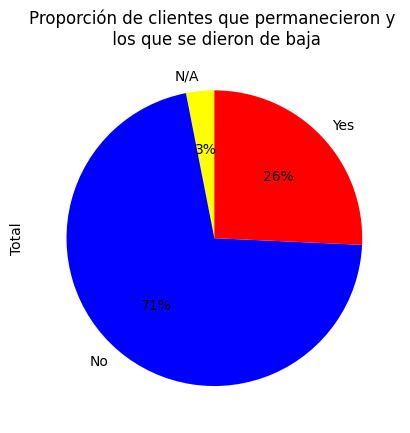

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

df1['Total'].plot(kind='pie', autopct='%1.f%%', startangle=90, colors=['yellow', 'blue','red'])
plt.title('Proporción de clientes que permanecieron y \n los que se dieron de baja')
plt.show()

plt.savefig('grafico_churn.png', dpi=300, bbox_inches='tight')

In [41]:
cliente_evade = df.query('Churn == "Yes"')
cliente_evade

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
2,0004-TLHLJ,Yes,Male,0,NaN,NaN,4,NaN,0,Fiber optic,...,1,0,0,0,1,NaN,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,NaN,NaN,13,NaN,0,Fiber optic,...,1,0,1,1,1,NaN,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,NaN,NaN,3,NaN,0,Fiber optic,...,0,1,1,0,1,NaN,Mailed check,83.90,267.4,2.80
18,0022-TCJCI,Yes,Male,1,NaN,NaN,45,NaN,0,DSL,...,1,0,0,1,2,NaN,Credit card (automatic),62.70,2791.5,2.09
19,0023-HGHWL,Yes,Male,1,NaN,NaN,1,NaN,0,DSL,...,0,0,0,0,1,NaN,Electronic check,25.10,25.1,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,9961-JBNMK,Yes,Male,1,NaN,NaN,21,NaN,0,Fiber optic,...,1,0,1,1,1,NaN,Bank transfer (automatic),96.80,2030.3,3.23
7246,9965-YOKZB,Yes,Male,1,NaN,NaN,9,NaN,1,Fiber optic,...,0,0,0,1,1,NaN,Electronic check,83.85,790.15,2.80
7260,9985-MWVIX,Yes,Female,0,NaN,NaN,1,NaN,0,Fiber optic,...,0,0,0,0,1,NaN,Mailed check,70.15,70.15,2.34
7261,9986-BONCE,Yes,Female,0,NaN,NaN,4,NaN,0,No,...,0,0,0,0,1,NaN,Bank transfer (automatic),20.95,85.5,0.70


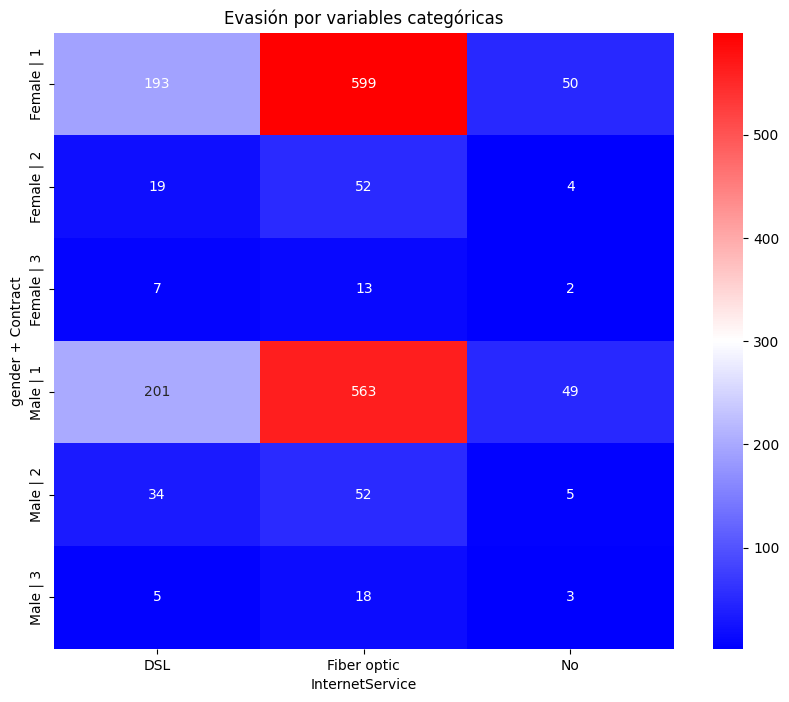

In [57]:
from matplotlib.colors import LinearSegmentedColormap
cliente_evade[['gender','InternetService','Contract']].value_counts()
cliente_evade = cliente_evade.copy()

cliente_evade['Gender_Contract'] = cliente_evade['gender'] + " | " + cliente_evade['Contract'].astype(str)

heatmap_data = cliente_evade.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["blue", "white", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Evasión por variables categóricas')
plt.xlabel('InternetService')
plt.ylabel('gender + Contract')
plt.show()

In [55]:
Variables_numericas = [ 'Churn', 'Charges.Monthly', 'tenure']

df_evasion_num = df[Variables_numericas].sort_values('Churn').set_index('Churn')
df_evasion_num

,Charges.Monthly,tenure
Churn,,
N/A,20.65,7
N/A,60.15,51
N/A,106.30,41
N/A,70.30,1
N/A,103.30,19
...,...,...
Yes,82.05,48
Yes,69.85,1
Yes,69.55,1


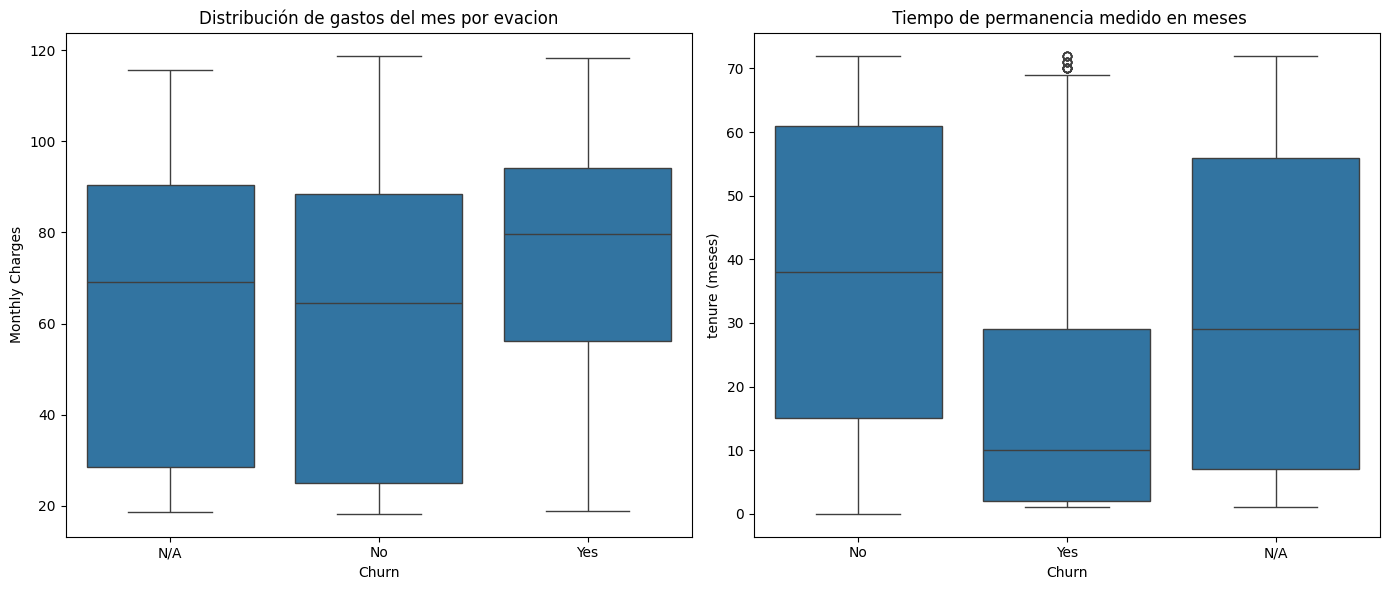

In [56]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data=df_evasion_num, x='Churn', y='Charges.Monthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Churn')
plt.ylabel('tenure (meses)')

plt.tight_layout()
plt.show()

#📄Informe final

Los clientes con contratos a Corto plazo o mensuales son mas propensos a abandonar los servicios que aquellos que utilizan formas de pago automatizados o electronicos (en linea).

RECOMENDACIÓN:

Tener gran enfoque en mejorar la experiencia inical de los clientes para mantener su interes en el servicio y ofrecer servicios especiales o promociones en contratos a largo plazo.